In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()


In [2]:
application_train = pd.read_csv('application_train.csv')
previous_application = pd.read_csv('previous_application.csv')
application_test = pd.read_csv('application_test.csv')

In [3]:
print('Size of application_train data', application_train.shape)
print('Size of previous_application data', previous_application.shape)
print('Size of application_test data', application_train.shape)

Size of application_train data (307511, 122)
Size of previous_application data (1670214, 37)
Size of application_test data (307511, 122)


In [4]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [6]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

# Missing Data

In [8]:
# checking missing data - Training
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


In [9]:
# checking missing data - Previous
total = previous_application.isnull().sum().sort_values(ascending = False)
percent = (previous_application.isnull().sum()/previous_application.isnull().count()*100).sort_values(ascending = False)
missing_previous_application_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_previous_application_data.head(15)

,Total,Percent
RATE_INTEREST_PRIVILEGED,1664263,99.643698
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_DOWN_PAYMENT,895844,53.636480
AMT_DOWN_PAYMENT,895844,53.636480
NAME_TYPE_SUITE,820405,49.119754
DAYS_TERMINATION,673065,40.298129
NFLAG_INSURED_ON_APPROVAL,673065,40.298129
DAYS_FIRST_DRAWING,673065,40.298129
DAYS_FIRST_DUE,673065,40.298129
DAYS_LAST_DUE_1ST_VERSION,673065,40.298129


## Plot Functions utility

In [10]:
def compare_with_target(col_name):
    #WName of type of suite of Applicants applied in terms of loan is repayed or not
    test=application_train.groupby([col_name,'TARGET']).size()
    test=test.unstack()

    # Normalize result
    result_pct = test.div(test.sum(1), axis=0)

    ax = result_pct.plot(kind='bar',figsize=(25,5),width = 0.8,edgecolor=None)
    plt.legend(labels=test.columns,fontsize= 12)
    title_name=str("Target Vs "+col_name)
    plt.title(title_name,fontsize= 16)
    plt.xticks(fontsize=14)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([])

    # Add this loop to add the annotations
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

In [11]:
def categorical_percentage_bar_plot(col_name,title=str(" Spread in %"),df=application_train):
    sns.set(style="whitegrid")
    plt.figure(figsize=(20,5))
    total = float(len(df))
    ax = sns.countplot(x=col_name, hue=col_name, data=df)
    plt.title(title, fontsize=20)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.show()

In [12]:
def distribution_plot(col_name):
    plt.figure(figsize=(12,5))
    plt.title(str("Distribution of "+col_name))
    ax = sns.distplot(application_train[col_name])

# Data Exploration

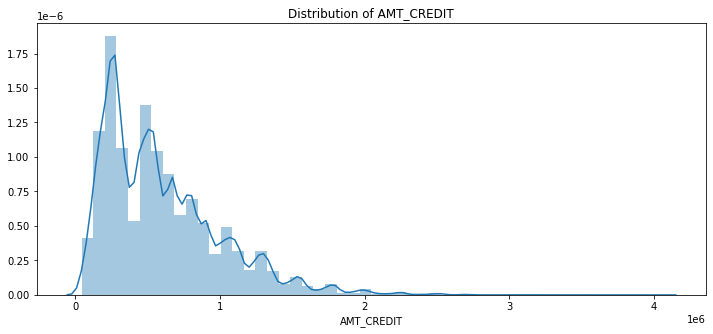

In [13]:
##Credit amount of the loan
distribution_plot("AMT_CREDIT")

Distribution is right side skewed , between 0 . 1,50000 has more entries 

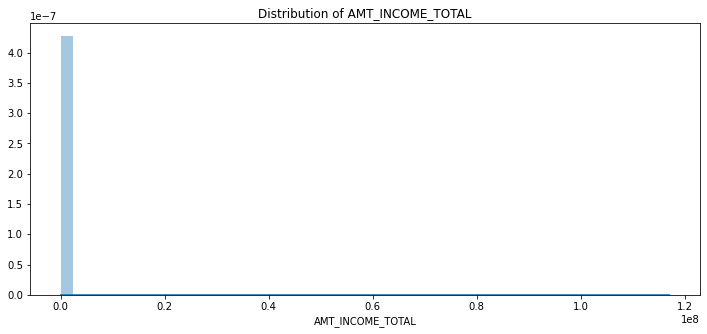

In [14]:
#Income of the client
distribution_plot("AMT_INCOME_TOTAL")

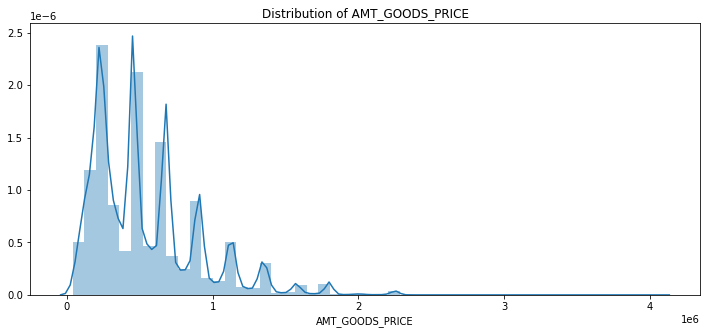

In [15]:
#For consumer loans it is the price of the goods for which the loan is given
distribution_plot("AMT_GOODS_PRICE")

Majority of the amount of goods price spreaded between 0-1.5

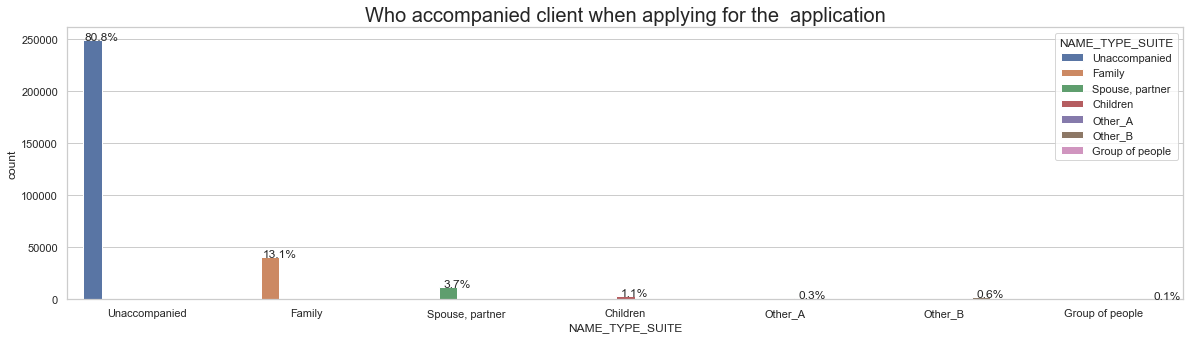

In [16]:
#Who was accompanying client when he was applying for the loan
categorical_percentage_bar_plot("NAME_TYPE_SUITE","Who accompanied client when applying for the  application")


Majority of the applicants are unaccompanied

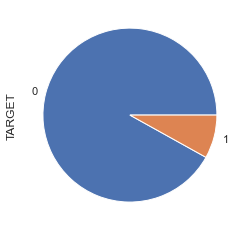

In [17]:
#Data Imbalanced or Not 0- Repaid , 1 - Not 
application_train["TARGET"].value_counts().plot(kind='pie')


As we can see data is highly imbalanced.

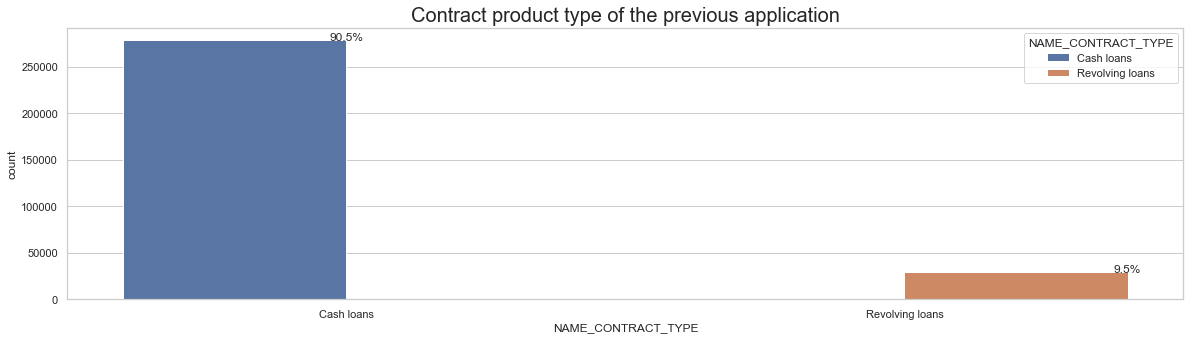

In [18]:
#Type Of Loan -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
categorical_percentage_bar_plot("NAME_CONTRACT_TYPE","Contract product type of the previous application")

Most of the loans are Cash loans which were taken by applicants.

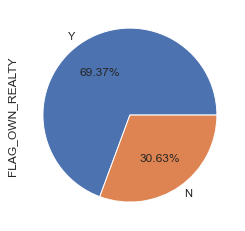

In [19]:
#Purpose Of Loan - Own Realty
application_train["FLAG_OWN_REALTY"].value_counts().plot(kind='pie',autopct='%1.2f%%')


70 % applicants has own realty

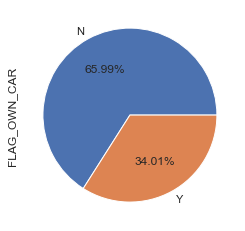

In [20]:
#Purpose Of Loan - Own Car
application_train["FLAG_OWN_CAR"].value_counts().plot(kind='pie' , autopct='%1.2f%%')


65  % has own car

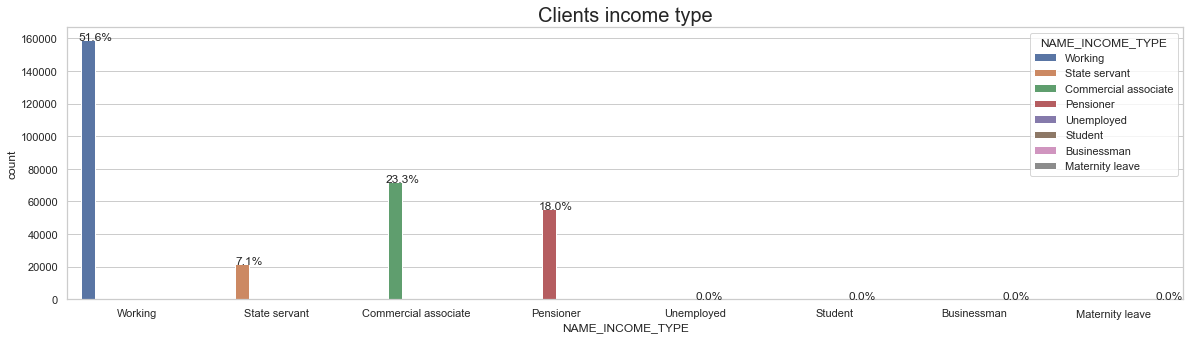

In [21]:
#Clients income type (businessman, working, maternity leave,…)

categorical_percentage_bar_plot("NAME_INCOME_TYPE","Clients income type")

Top 3 ratios go like Working , Commercial & Pesnioner

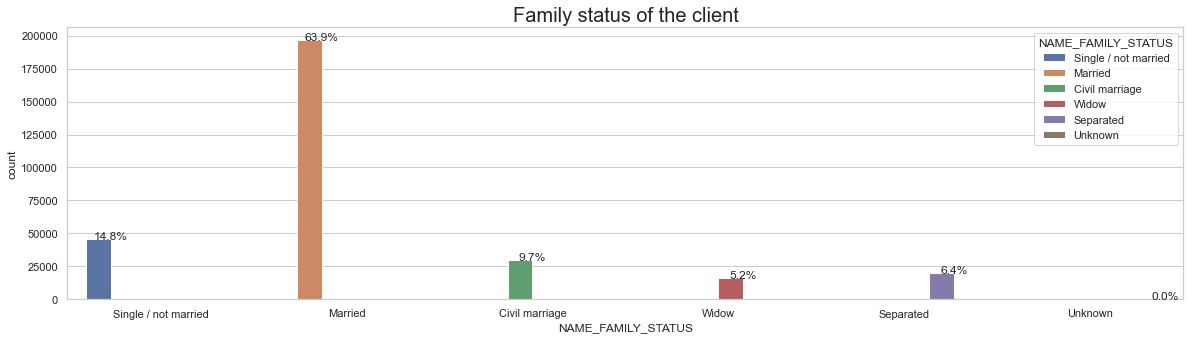

In [22]:
#Family status of the client
categorical_percentage_bar_plot("NAME_FAMILY_STATUS","Family status of the client")

#Most of the applicants are Married 

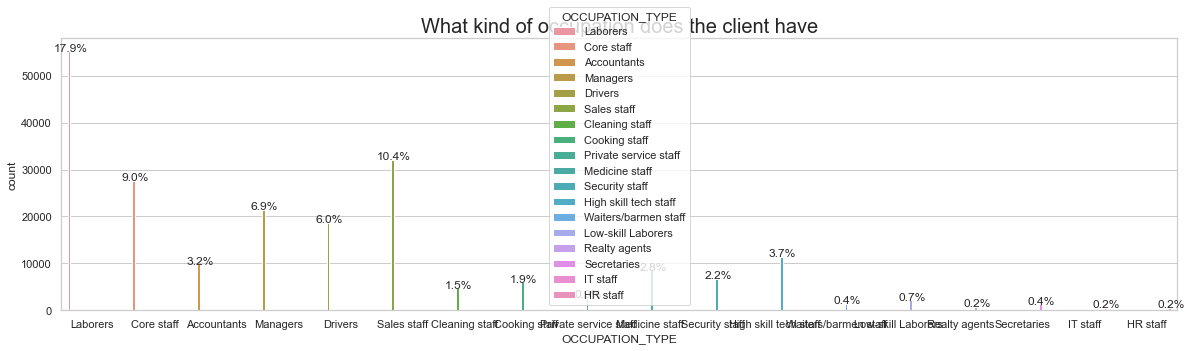

In [23]:
#What kind of occupation does the client have

categorical_percentage_bar_plot("OCCUPATION_TYPE","What kind of occupation does the client have")

 Top Applicant's who applied for loan :
Laborers - Apprx. 55 K
Sales Staff - Approx. 32 K
Core staff - Approx. 28 K
Managers - Approx. 21 K
Drivers - Approx. 19 K

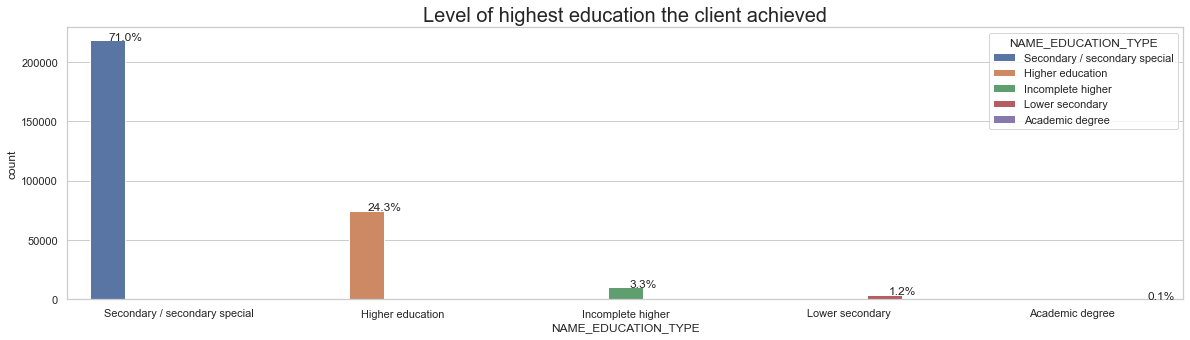

In [24]:
#Level of highest education the client achieved
categorical_percentage_bar_plot("NAME_EDUCATION_TYPE","Level of highest education the client achieved")

Majority of applicants have secondary and 2nd most having higher education.


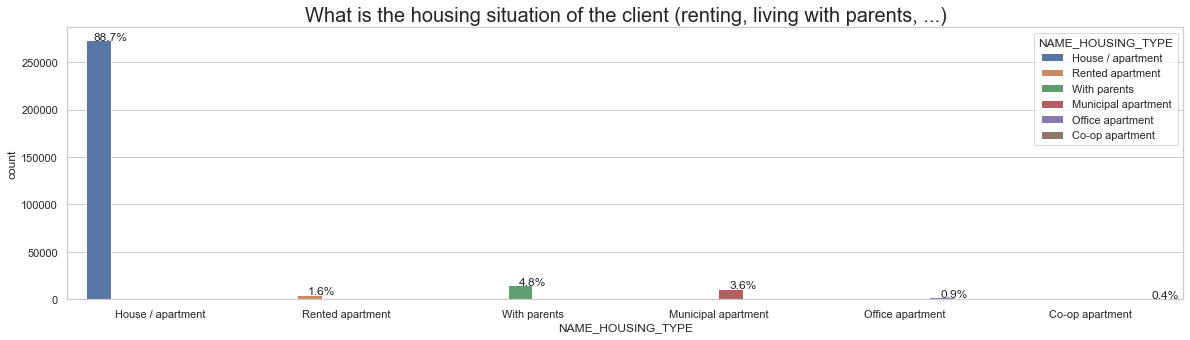

In [25]:
#What is the housing situation of the client (renting, living with parents, ...)
categorical_percentage_bar_plot("NAME_HOUSING_TYPE","What is the housing situation of the client (renting, living with parents, ...)")

Approx. 90 % peoples applied for loan, they mentioned type of house is House / Appartment

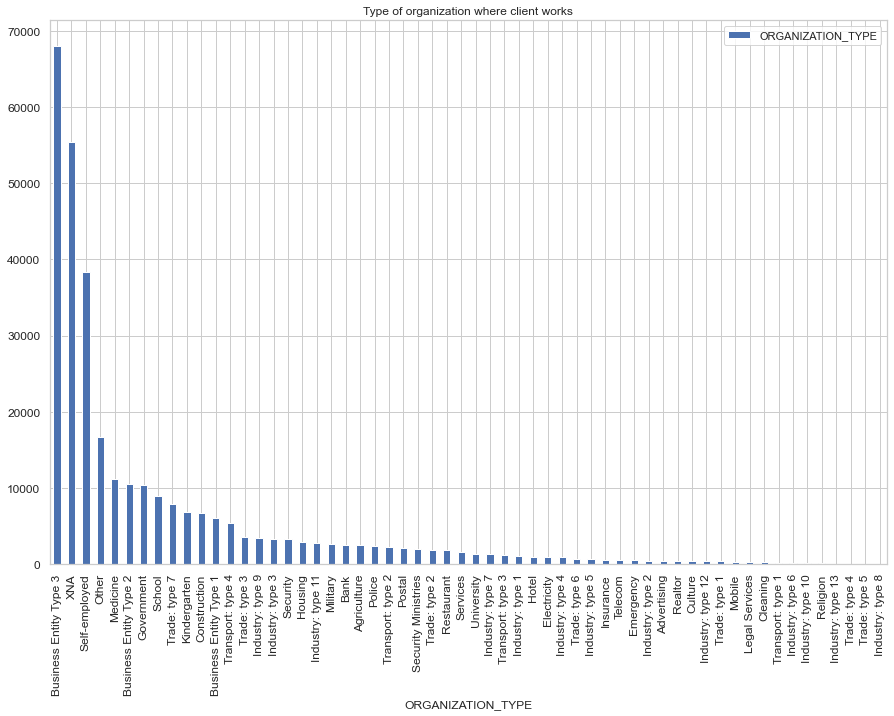

In [26]:
#Type of organization where client works
ax = application_train["ORGANIZATION_TYPE"].value_counts().plot(kind='bar', title ="Type of organization where client works", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("ORGANIZATION_TYPE", fontsize=12)
plt.show()


Business Entity Type 3 - Approx. 68 K
XNA - Approx. 55 K
Self employed - Approx. 38 K
Others - Approx. 17 K
Medicine - Approx. 11 K

## Exploration in Terms of Loan Repayed or Not

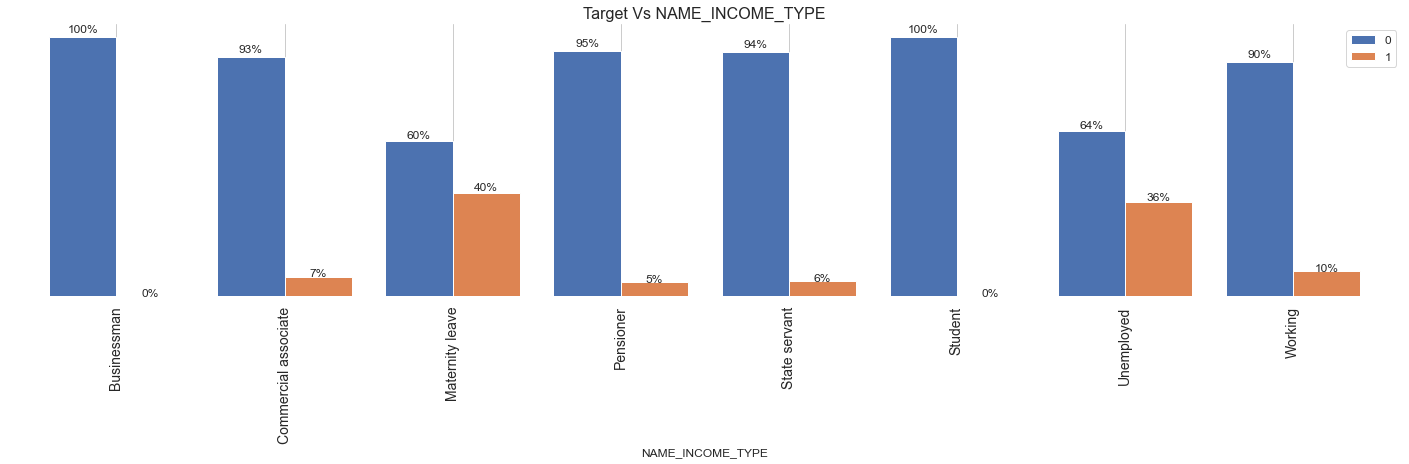

In [27]:
#Income sources of Applicant's in terms of loan is repayed or not

compare_with_target("NAME_INCOME_TYPE")

Businessman has lower repaid rate than others

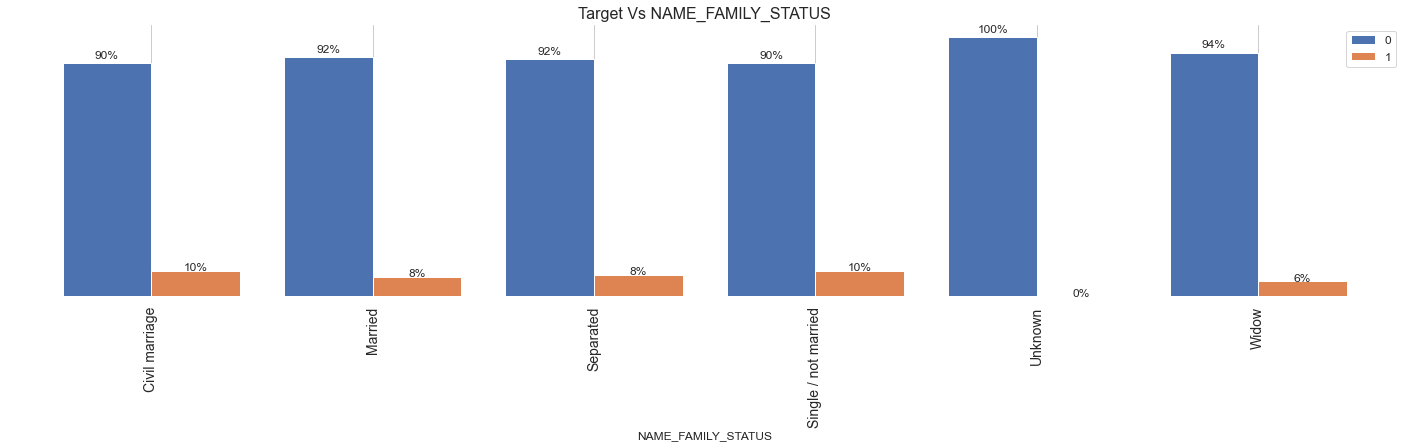

In [28]:
#Family Status of Applicants in terms of loan is repayed or not

compare_with_target("NAME_FAMILY_STATUS")

Married , Widow , Separated has more repaid ratio  than others

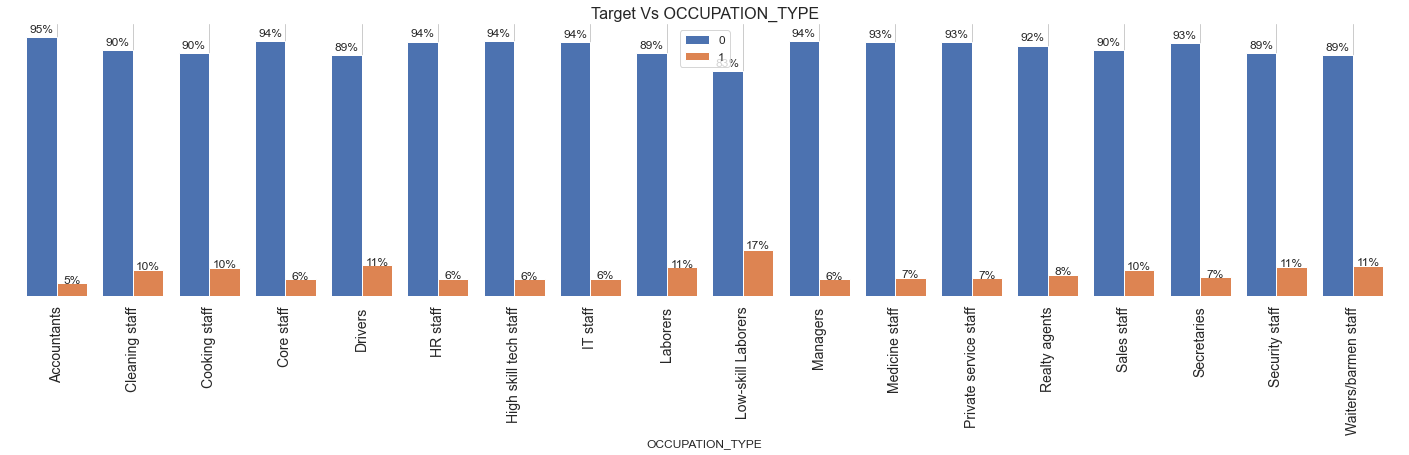

In [29]:
#Occupation of Applicants in terms of loan is repayed or not
compare_with_target("OCCUPATION_TYPE")

Accountants tends to repaid more ,low skill worked struggled to repay the loan

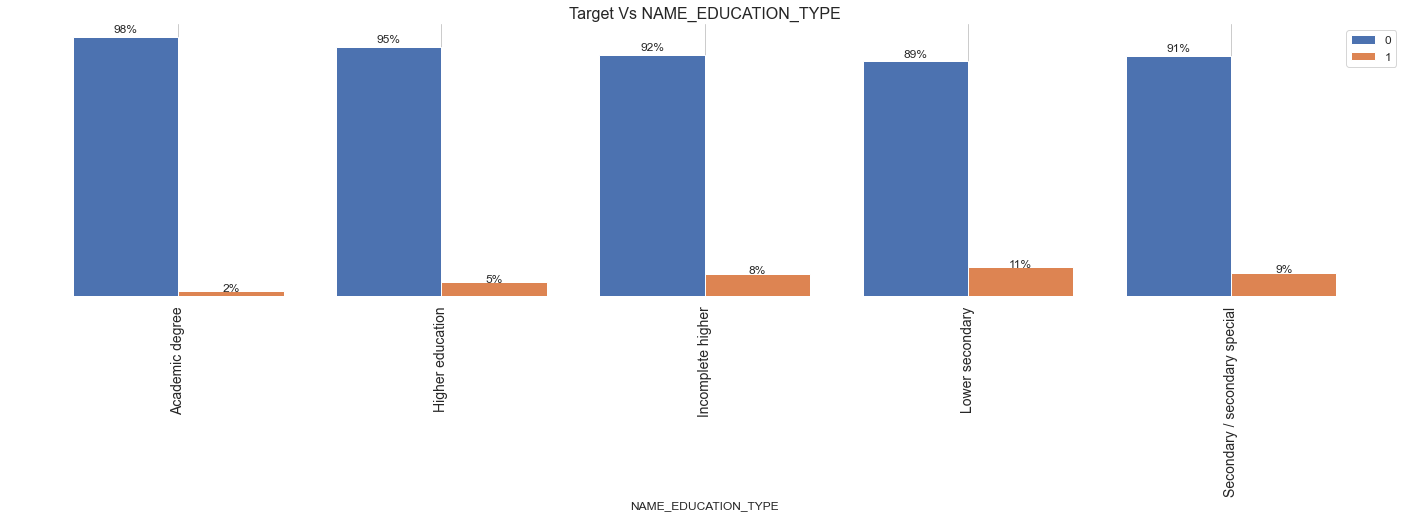

In [30]:
#Education of Applicants in terms of loan is repayed or not
compare_with_target("NAME_EDUCATION_TYPE")

Those who have acadamic degree repays loan , other side secondary education type holders struggles to pay loan

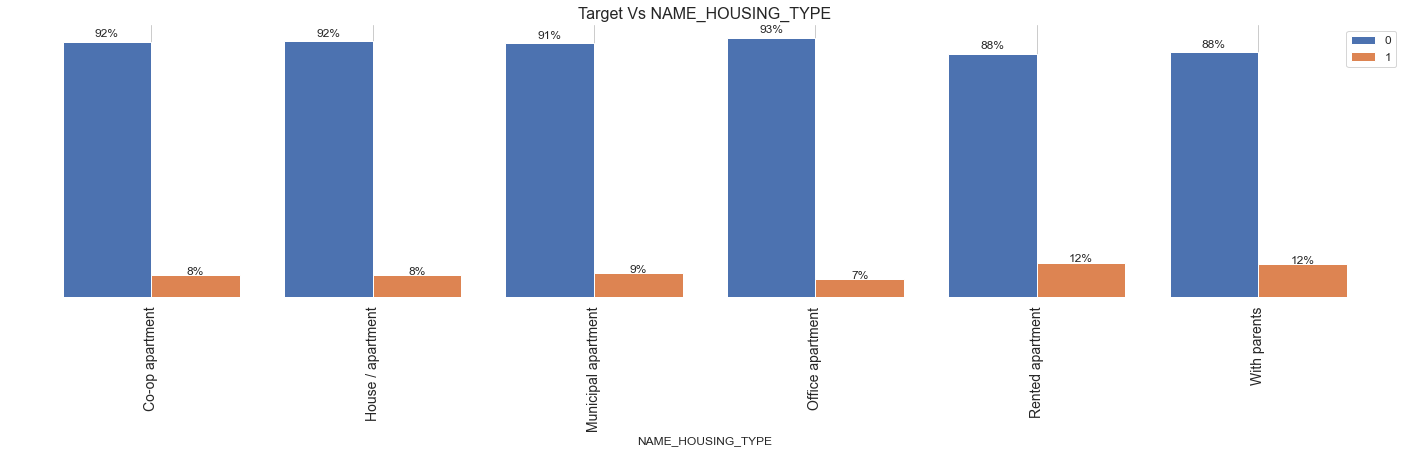

In [31]:
#Which type of House of Applicants applied in terms of loan is repayed or not
compare_with_target("NAME_HOUSING_TYPE")

Those who are in Rented apartments & accompanied with parents struggled to repay the loan

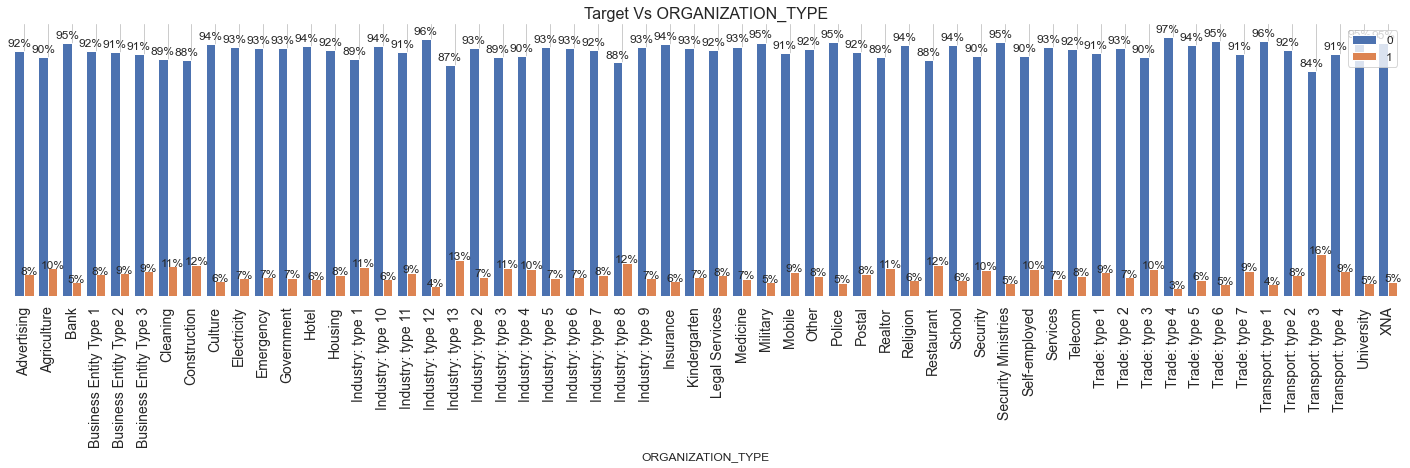

In [32]:
# type of ORGANIZATION TYPE of Applicants applied in terms of loan is repayed or not

compare_with_target("ORGANIZATION_TYPE")

Transport Type 2 Employees has high non repaid ratios

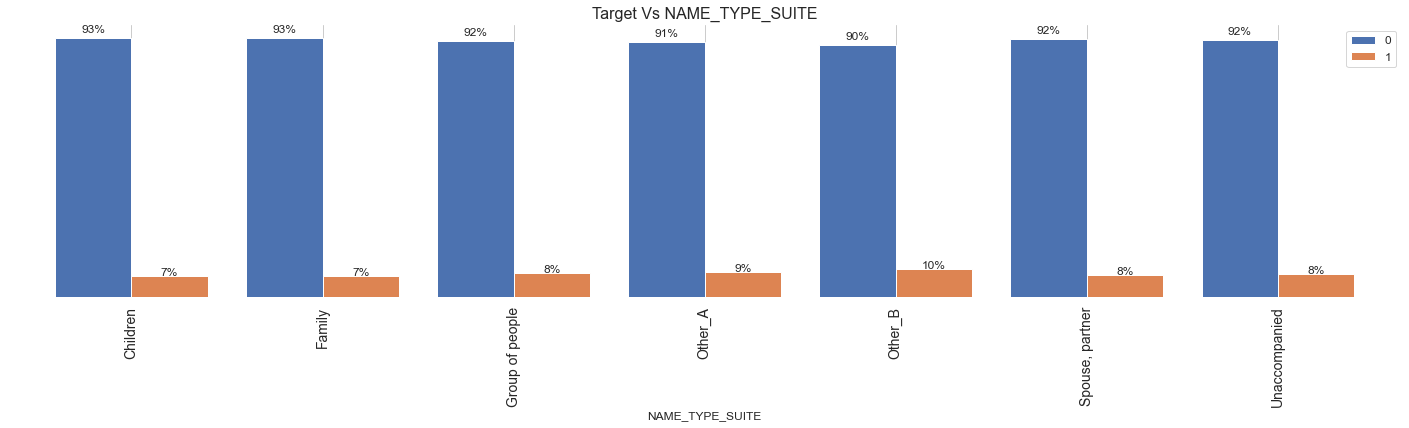

In [33]:
compare_with_target('NAME_TYPE_SUITE')

Those who are with famil & children type of suite has higher repaid % than others

## Exploration of Previous Application data

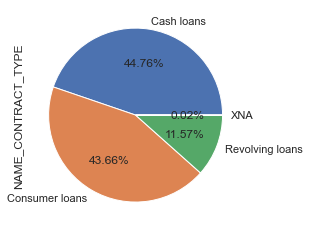

In [34]:
#Contract product type of previos loans
previous_application["NAME_CONTRACT_TYPE"].value_counts().plot(kind='pie' , autopct='%1.2f%%')


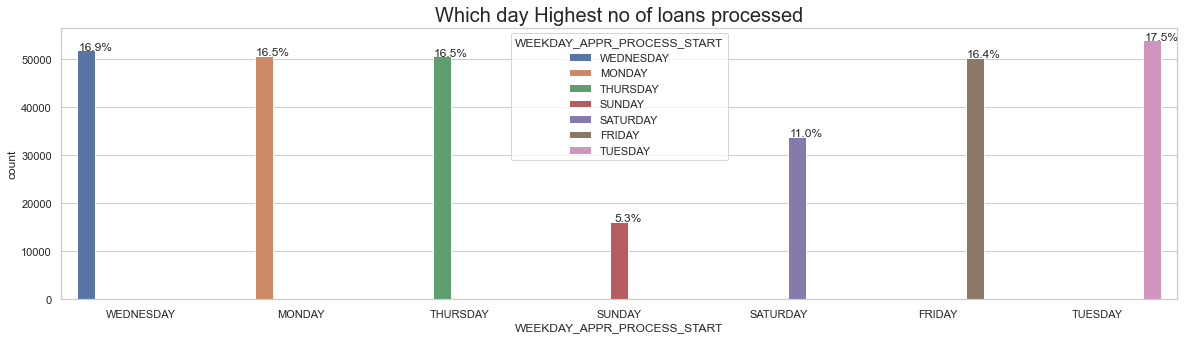

In [35]:
#Which day Highest no of loans processed

categorical_percentage_bar_plot("WEEKDAY_APPR_PROCESS_START","Which day Highest no of loans processed")

Weekdays have more processed loan than weekend 

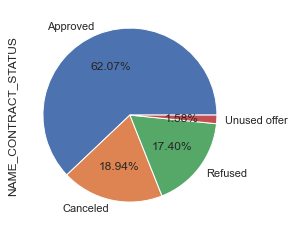

In [36]:
#Contract approved or not
previous_application["NAME_CONTRACT_STATUS"].value_counts().plot(kind='pie' , autopct='%1.2f%%')


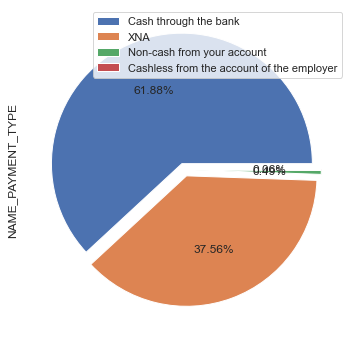

In [37]:
#payment method to use pay previous loan
distance = 0.05
separate = (distance, distance, distance, distance)
previous_application["NAME_PAYMENT_TYPE"].value_counts().plot(kind='pie',labels=None , legend=True,autopct='%1.2f%%', figsize=(10,6),explode=separate,labeldistance=1.2)


As we can most of the payment(61.9 %) has done thorugh cash only.

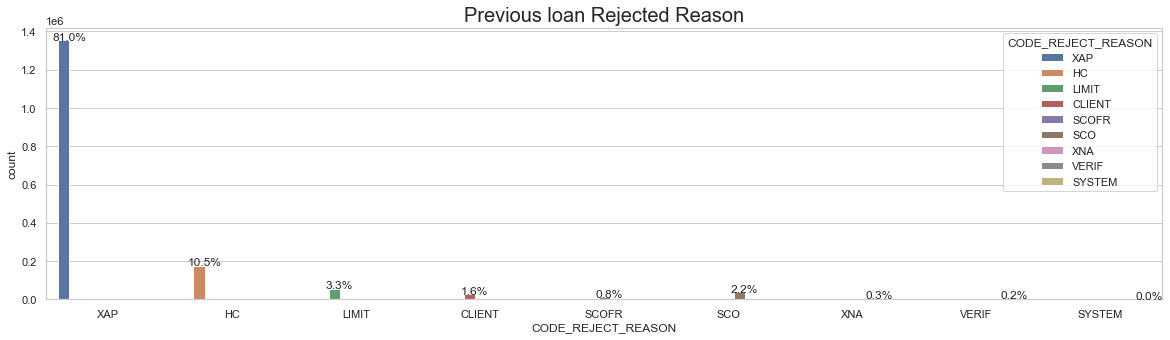

In [38]:
#Why Previous loan Rejected
categorical_percentage_bar_plot("CODE_REJECT_REASON","Previous loan Rejected Reason",df=previous_application)

Previous loan rejected reason not revelaed properly 

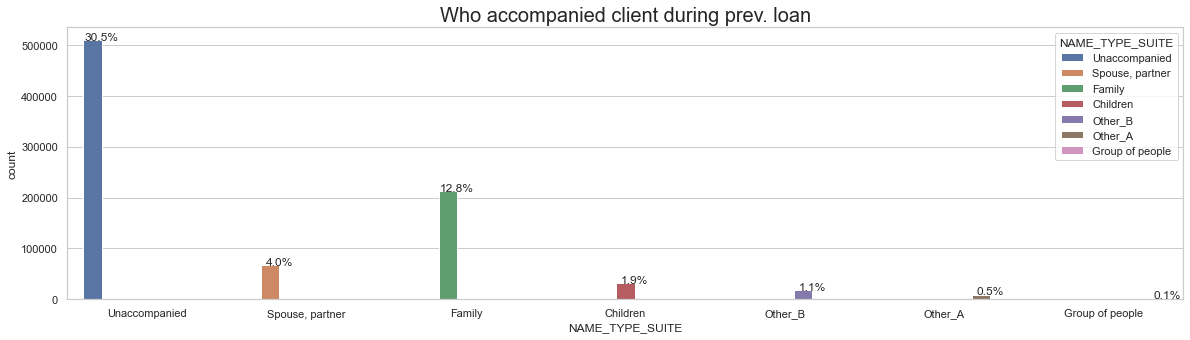

In [39]:
#previous loan _clinet accompanied
categorical_percentage_bar_plot("NAME_TYPE_SUITE","Who accompanied client during prev. loan",df=previous_application)

Previous application denotes most applicants are unaccompanied

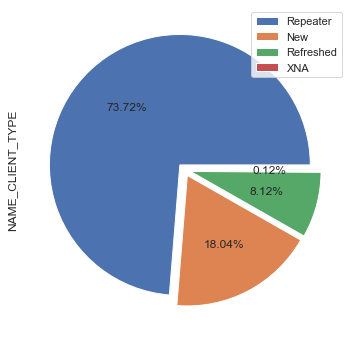

In [40]:
#Freshness of client
distance = 0.05
separate = (distance, distance, distance, distance)
previous_application["NAME_CLIENT_TYPE"].value_counts().plot(kind='pie',labels=None , legend=True,autopct='%1.2f%%', figsize=(10,6),explode=separate,labeldistance=1.2)


Majority of the clients were repeaters

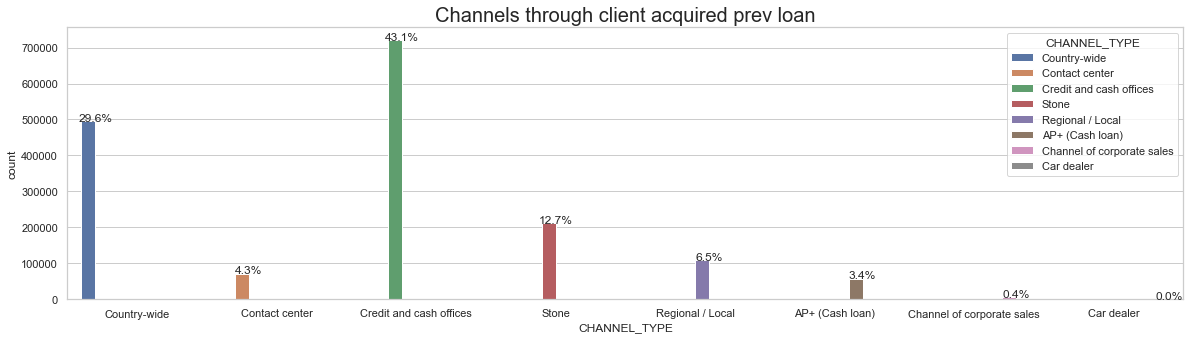

In [41]:
#Channels through client acquired prev loan
categorical_percentage_bar_plot("CHANNEL_TYPE","Channels through client acquired prev loan",df=previous_application)

Top 3  Marketing medium seems to ve Credit & cash offices , Country side , stone 

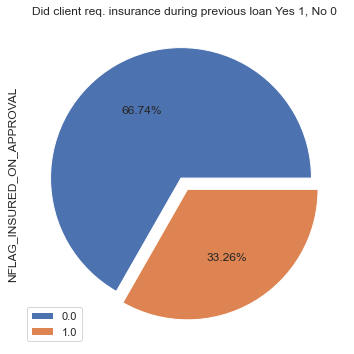

In [42]:
#Did client req. insurance during previous loan
distance = 0.05
separate = (distance, distance)
previous_application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot(kind='pie',labels=None , legend=True,autopct='%1.2f%%', figsize=(10,6),explode=separate,labeldistance=1.2 ,title='Did client req. insurance during previous loan Yes 1, No 0')


Majority of clients didn't opt for Insurance

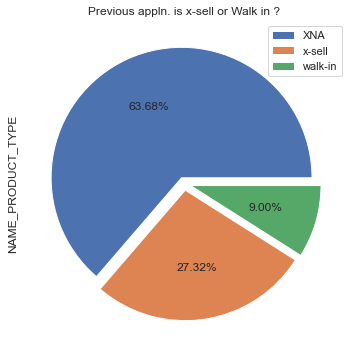

In [43]:
#Previous appln. is x-sell or Walk in ?
distance = 0.05
separate = (distance, distance,distance)
previous_application["NAME_PRODUCT_TYPE"].value_counts().plot(kind='pie',labels=None , legend=True,autopct='%1.2f%%', figsize=(10,6),explode=separate,labeldistance=1.2 ,title='Previous appln. is x-sell or Walk in ?')


Majority of the processed product type data not available

In [44]:
(application_train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

### The age variable looks to be populated with no unreasonable outliers


In [45]:
(application_train['DAYS_EMPLOYED'] / -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

### Something doesn't look right in the time employed variable with a negative 1000 years as the minimum variable. the max seems resonable. 


In [46]:
print(np.sum(application_train['DAYS_EMPLOYED'] > 0))
print(np.sum(application_train['DAYS_EMPLOYED'] > 0)/len(application_train['DAYS_EMPLOYED'])*100, 'percent of the train data set has negative length of employment')

55374
18.00716071945394 percent of the train data set has negative length of employment


In [47]:
mask = application_train.DAYS_EMPLOYED > 0
column_name = 'DAYS_EMPLOYED'
application_train.loc[mask, column_name] = 0

In [48]:
(application_train['DAYS_EMPLOYED'] / -365).describe()
# std of 6.3 years makes much more sense

count    307511.000000
mean          5.355748
std           6.320737
min          -0.000000
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

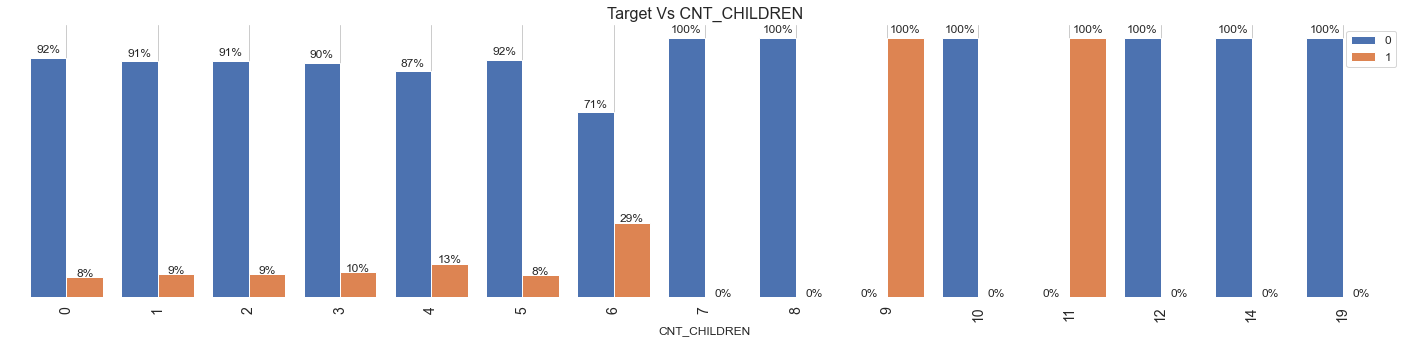

In [49]:
compare_with_target("CNT_CHILDREN")

It's unclear information about repaying history vs CNT_CHILDREN

In [50]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


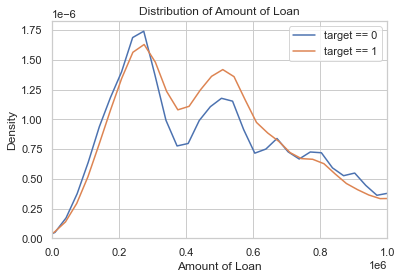

In [51]:

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'AMT_CREDIT'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'AMT_CREDIT'], label = 'target == 1')

plt.xlim(0, 1000000)

# Labeling of plot
plt.xlabel('Amount of Loan'); plt.ylabel('Density'); plt.title('Distribution of Amount of Loan');

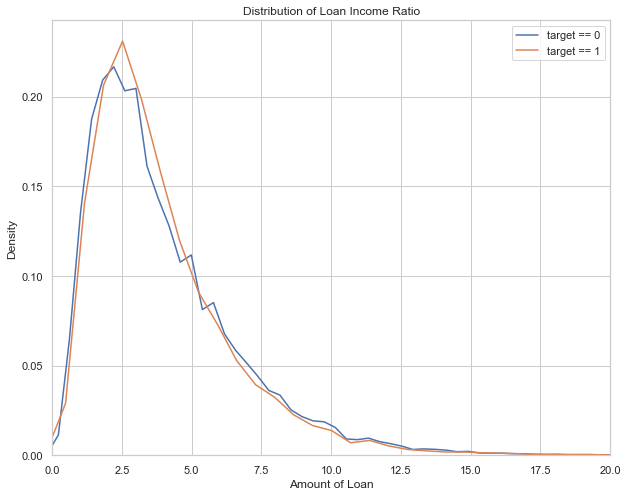

In [52]:
#New Variable for ration of loan to the income
#assumption here is that this ratio demonstrated the strain of the loan 
application_train['Loan_Income_Ratio'] = application_train['AMT_CREDIT'] / application_train['AMT_INCOME_TOTAL']
application_test['Loan_Income_Ratio'] = application_test['AMT_CREDIT'] / application_test['AMT_INCOME_TOTAL']


plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 0, 'Loan_Income_Ratio'], label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(application_train.loc[application_train['TARGET'] == 1, 'Loan_Income_Ratio'], label = 'target == 1')

plt.xlim(0, 20)

# Labeling of plot
plt.xlabel('Amount of Loan'); plt.ylabel('Density'); plt.title('Distribution of Loan Income Ratio');